In [86]:
from FourierSeries import *
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

In [66]:
n = sp.Symbol('n', integer = True, positive = True)
x = sp.Symbol('x')

# Question 1

In [90]:
f = lambda x: x**2
L = sp.pi
q1 = FourierSeries(f, length=L, series_type='cos')

### a. find the coefficients of the cosine series

$A_0$

In [5]:
sp.nsimplify((1 / (L)) * sp.integrate(f(x), (x, 0, L)))

pi**2/3

$A_n$

In [9]:
sp.nsimplify((2 / L) * sp.integrate(f(x) * sp.cos(n * x * sp.pi / L), (x, 0, L)))

4*(-1)**n/n**2

### b. find the first four non-zero terms of the series

In [9]:
q1.series(3)

-4*cos(x) + cos(2*x) - 4*cos(3*x)/9 + pi**2/3

### c. plot f(x) and the first four terms of the series

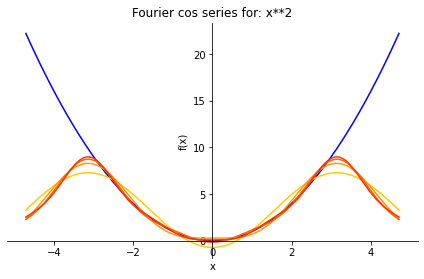

In [11]:
q1.plot_f_series_range(1,4).show()

### d. to what function will the full fourier series converge?

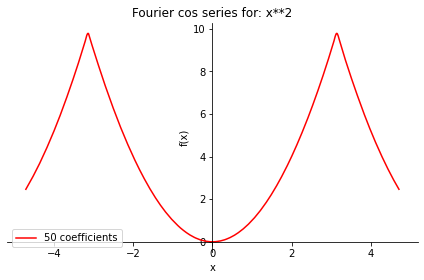

In [15]:
q1.plot_series(50).show()


# Question 2
Compute the Fourier series of $g(x)=\sin^2(x)$ on $[-\pi,\pi]$

In [28]:
g = lambda x: sp.sin(x)**2
L = sp.pi
q2 = FourierSeries(g, L)

In [29]:
q2.series(5)

1/2 - cos(2*x)/2

# Question 3
Solve the eigenvalue problem

$X''+\lambda X = 0, \; X(0)=0, \; X'(\pi )=0$

In other words, (P) find all λ for which there is a nontrivial solution to this equation. Give a
complete argument. (C) Plot the first 5 eigenfunctions on the same grid.

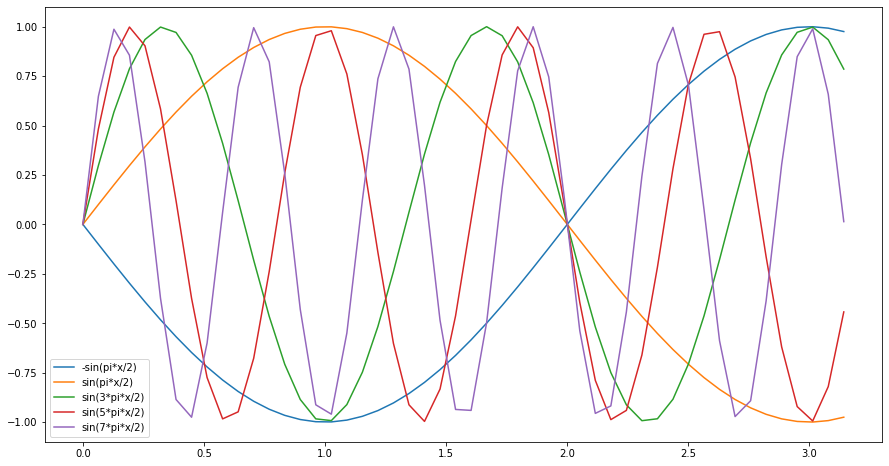

In [75]:
plt.figure(figsize = (15,8))
_f = lambda x, n: sp.nsimplify((sp.sin((2 * n - 1) * sp.pi / 2 * x)))
f = sp.lambdify([x,n], _f(x,n))
xi = np.linspace(0, np.pi)
for i in range(5):
    plt.plot(xi, f(xi,i), label = f'{_f(x,i)}')
plt.legend()
plt.show()


# Question 4
Here is a new IBVP:

\begin{cases} 
      u_{tt}=u_{xx}-u_t \\
      u(0,t)=0 \\
      u(\pi,t)=0\\
      u(x,0)=0\\
      u_t(x,0)=\sin(3x)
\end{cases}

### c. either produce a series of graphs at equally spaced time intervals or an animation that shows the evolution of the initial profile for a few seconds

In [85]:
t = sp.Symbol('t')
X = lambda x,n: sp.sin(n*x)
T = lambda t,n: sp.exp(t*(-1+sp.sqrt(1-4*n**2))/2)+sp.exp(t*(-1-sp.sqrt(1-4*n**2))/2)

_u = lambda x, t: sp.summation(X(x,n)+T(t,n), (n,1,10))
u = sp.lambdify([x, t], _u(x, t))


This gives lot of errors since it can't plot complex numbers

In [89]:
xi = np.linspace(0, np.pi)
ti = np.linspace(0, 10)

X, T = np.meshgrid(xi, ti, indexing='xy')

ui = u(X, T)

# fig = go.Figure(data=[go.Surface(z=ui, x=xi, y=ti, colorscale='temps')])

# fig.update_traces(
#     contours_z=dict(
#         show=True, usecolormap=True,
#         highlightcolor="white",
#         project_z=True))

# fig.update_layout(
#     title='Initial profile', autosize=True,
#     width=500, height=500,
#     scene_camera_eye=dict(x=1.87, y=0.88, z=0.64),
#     margin=dict(l=50, r=75, b=50, t=75))

# fig.show()
